# 🚑 Analyse av trafikkulykker etter skadegrad

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Last inn data
df = pd.read_csv("skader_skadegrad_ny.csv", encoding='latin1')
df = df[df.columns[0]].str.split(";", expand=True)
df.columns = ["År", "Måned", "Kommune", "Drept", "Hardt skadd", "Lettere skadd", "Sum"]

# Konverter relevante kolonner
for col in ["År", "Drept", "Hardt skadd", "Lettere skadd", "Sum"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


## Analyse 1: Skadegrad over tid

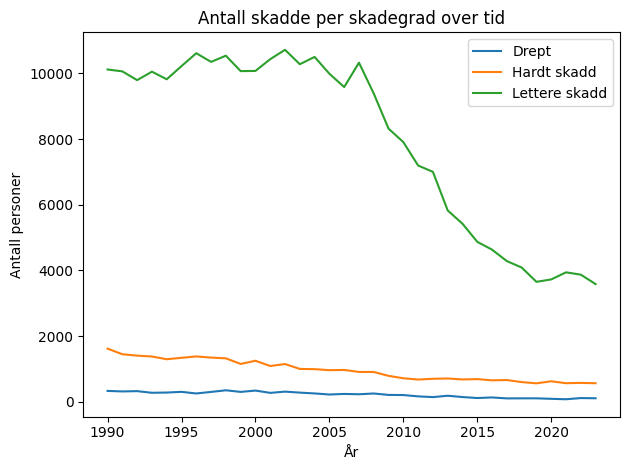

In [2]:

summary1 = df.groupby("År")[["Drept", "Hardt skadd", "Lettere skadd"]].sum()
summary1.plot()
plt.title("Antall skadde per skadegrad over tid")
plt.xlabel("År")
plt.ylabel("Antall personer")
plt.tight_layout()
plt.show()


## 🔹 Analyse 1: Skadegrad over tid
- **Observasjon**: Antall lettere skadde holdt seg stabilt rundt 10 000 per år fram til 2007–2008, deretter et markant fall.
- **Tolkning**: Fallet etter 2010 kan skyldes bedre trafikksikkerhet, moderne biler med flere sikkerhetsfunksjoner, samt kampanjer og tiltak fra myndighetene.

## Analyse 2: Skader per måned

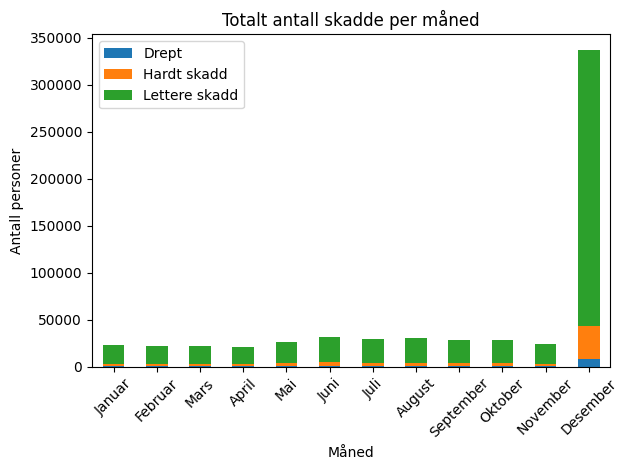

In [3]:

months_order = ["Januar", "Februar", "Mars", "April", "Mai", "Juni",
                "Juli", "August", "September", "Oktober", "November", "Desember"]
summary2 = df.groupby("Måned")[["Drept", "Hardt skadd", "Lettere skadd"]].sum().reindex(months_order)
summary2.plot(kind="bar", stacked=True)
plt.title("Totalt antall skadde per måned")
plt.xlabel("Måned")
plt.ylabel("Antall personer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔹 Analyse 2: Totalt antall skadde per måned
- **Observasjon**: Desember viser ekstremt høyt antall skader (trolig datakvalitetsfeil). Ellers ser vi økning i sommermånedene.
- **Tolkning**: Økt trafikk i feriemåneder kan føre til flere hendelser. Desember-avviket må undersøkes nærmere (mulig feil i registrering eller aggregert data fra flere år).


## Analyse 3: Kommuner med flest skader

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_14936\3369610864.py:7: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ofssuksr\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


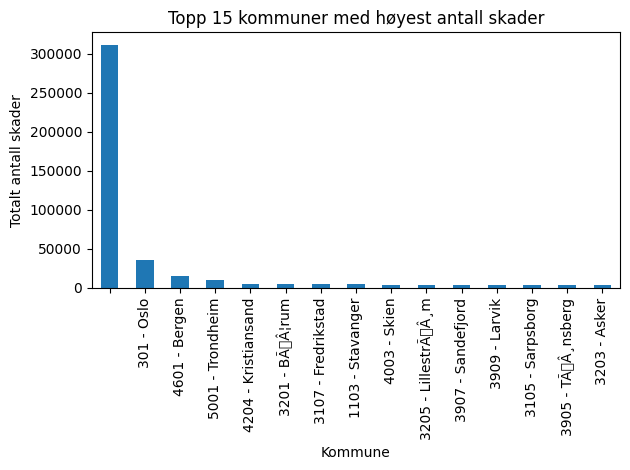

In [4]:

summary3 = df.groupby("Kommune")["Sum"].sum().sort_values(ascending=False).head(15)
summary3.plot(kind="bar")
plt.title("Topp 15 kommuner med høyest antall skader")
plt.xlabel("Kommune")
plt.ylabel("Totalt antall skader")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 🔹 Analyse 3: Kommuner med flest skader
- **Observasjon**: Oslo har klart flest registrerte skader.
- **Tolkning**: Dette gjenspeiler trolig den høye befolkningstettheten og trafikkmengden. Andre bykommuner (Bergen, Trondheim) følger samme mønster.


## Analyse 4: Fordeling av skadegrad i prosent

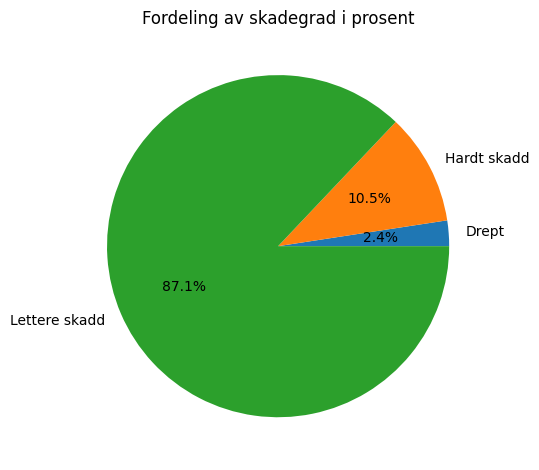

In [5]:

totals = df[["Drept", "Hardt skadd", "Lettere skadd"]].sum()
proportions = totals / totals.sum() * 100
proportions.plot(kind="pie", autopct="%.1f%%", ylabel="")
plt.title("Fordeling av skadegrad i prosent")
plt.tight_layout()
plt.show()


## 🔹 Analyse 4: Fordeling av skadegrad
- **Observasjon**: Lettere skader utgjør 87 %, hardt skadd 10.5 %, og drepte kun 2.4 %.
- **Tolkning**: De fleste trafikkulykker er heldigvis ikke livstruende. Dette kan også indikere forbedret trafikksikkerhet og bedre medisinsk beredskap.


## Analyse 5: Drepte og hardt skadde over tid

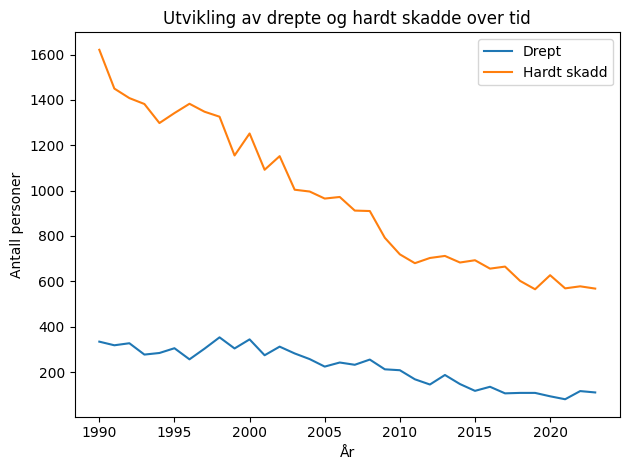

In [6]:

summary5 = df.groupby("År")[["Drept", "Hardt skadd"]].sum()
summary5.plot()
plt.title("Utvikling av drepte og hardt skadde over tid")
plt.xlabel("År")
plt.ylabel("Antall personer")
plt.tight_layout()
plt.show()


## 🔹 Analyse 5: Drepte og hardt skadde over tid
- **Observasjon**: Begge kategorier har falt betydelig etter 2005.
- **Tolkning**: Dette kan indikere vellykket virkning av nullvisjonen, bedre infrastruktur og raskere akuttberedskap.


## Analyse 6: Lettere skadde per måned

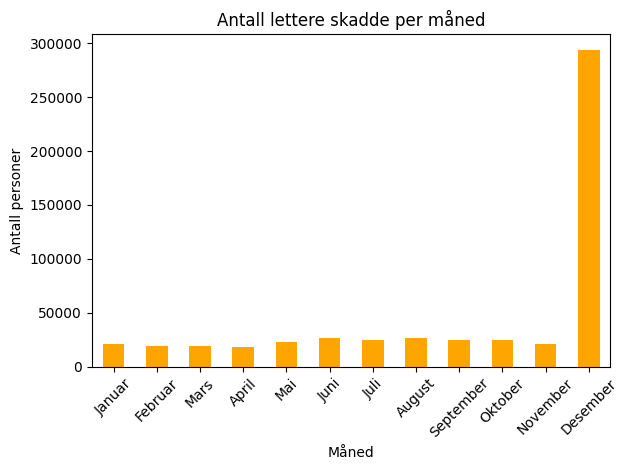

In [7]:

summary6 = df.groupby("Måned")["Lettere skadd"].sum().reindex(months_order)
summary6.plot(kind="bar", color='orange')
plt.title("Antall lettere skadde per måned")
plt.xlabel("Måned")
plt.ylabel("Antall personer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔹 Analyse 6: Lettere skadde per måned
- **Observasjon**: Desember har unaturlig høy forekomst (som nevnt i Analyse 2). Juli og august har også topper.
- **Tolkning**: Økt sommertrafikk og ferieaktiviteter bidrar til flere lettere ulykker.


## Analyse 7: Kommuner med høy gjennomsnittlig dødsrate

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_14936\1912805886.py:8: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_14936\1912805886.py:8: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ofssuksr\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ofssuksr\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


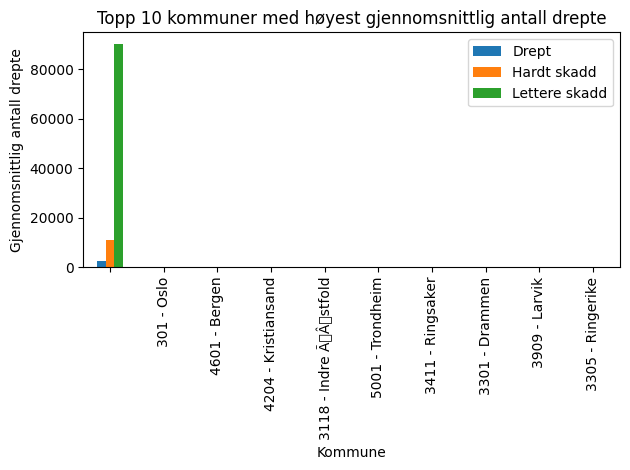

In [8]:

summary7 = df.groupby("Kommune")[["Drept", "Hardt skadd", "Lettere skadd"]].mean()
top_drept = summary7.sort_values("Drept", ascending=False).head(10)
top_drept.plot(kind="bar")
plt.title("Topp 10 kommuner med høyest gjennomsnittlig antall drepte")
plt.xlabel("Kommune")
plt.ylabel("Gjennomsnittlig antall drepte")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 🔹 Analyse 7: Kommuner med høy dødelighet per skadetilfelle
- **Observasjon**: Enkelte småkommuner har høy gjennomsnittlig andel drepte.
- **Tolkning**: Få, men alvorlige ulykker kan gi høyt snitt. Krever lokal innsats og vurdering av farlige veistrekninger.



## 🧠 Tolkning og konklusjon

- Antall **alvorlige trafikkulykker har gått betydelig ned** de siste tiårene.
- **Lettere skader dominerer**, men bør ikke bagatelliseres pga. omfang.
- **Dødsfall er sjeldne**, men konsekvensene store – og trenden er heldigvis positiv.
- **Desember-tallene skiller seg unormalt ut** og bør undersøkes for mulig datakvalitetsproblem.
- Storbyer (som Oslo) har flest skader, men småkommuner med høy dødelighet per innbygger bør få ekstra fokus.
- **Trafikksikkerhetstiltak virker**, men det er fortsatt potensial for å styrke innsatsen i høyrisikomåneder og kommuner.
